In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
df = pd.read_csv('housing.csv')

In [3]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [5]:
df.duplicated().sum()

0

In [6]:
df[df['total_bedrooms'].isnull()].head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
290,-122.16,37.77,47.0,1256.0,NaN,570.0,218.0,4.3750,161900.0,NEAR BAY
341,-122.17,37.75,38.0,992.0,NaN,732.0,259.0,1.6196,85100.0,NEAR BAY
538,-122.28,37.78,29.0,5154.0,NaN,3741.0,1273.0,2.5762,173400.0,NEAR BAY
563,-122.24,37.75,45.0,891.0,NaN,384.0,146.0,4.9489,247100.0,NEAR BAY
696,-122.10,37.69,41.0,746.0,NaN,387.0,161.0,3.9063,178400.0,NEAR BAY


In [7]:
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


<Axes: xlabel='total_bedrooms', ylabel='Count'>

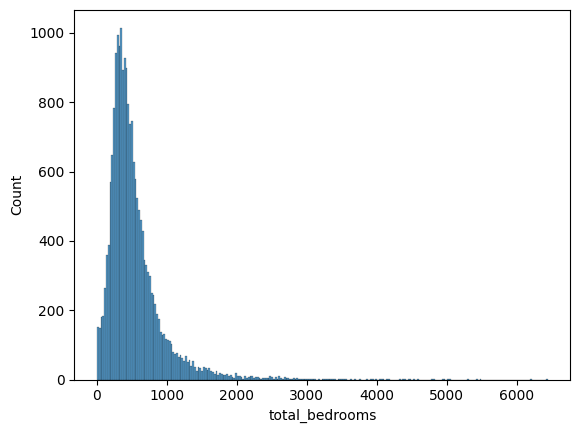

In [8]:
sns.histplot(df, x='total_bedrooms')

In [9]:
skewness = df['total_bedrooms'].skew()

print("Skewness Coefficient:", skewness)

Skewness Coefficient: 3.459546331523342


In [10]:
from sklearn.impute import SimpleImputer 

In [11]:
imputer = SimpleImputer(strategy='median')
df[['total_bedrooms']] = imputer.fit_transform(df[['total_bedrooms']])

In [12]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [13]:
df['ocean_proximity'].value_counts()

ocean_proximity
<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: count, dtype: int64

<Axes: xlabel='ocean_proximity', ylabel='count'>

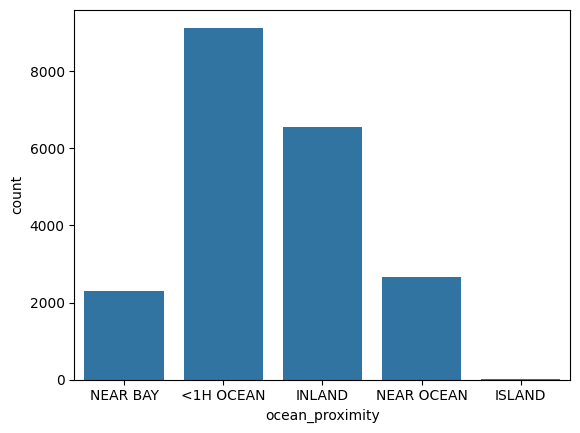

In [14]:
sns.countplot(df, x='ocean_proximity')

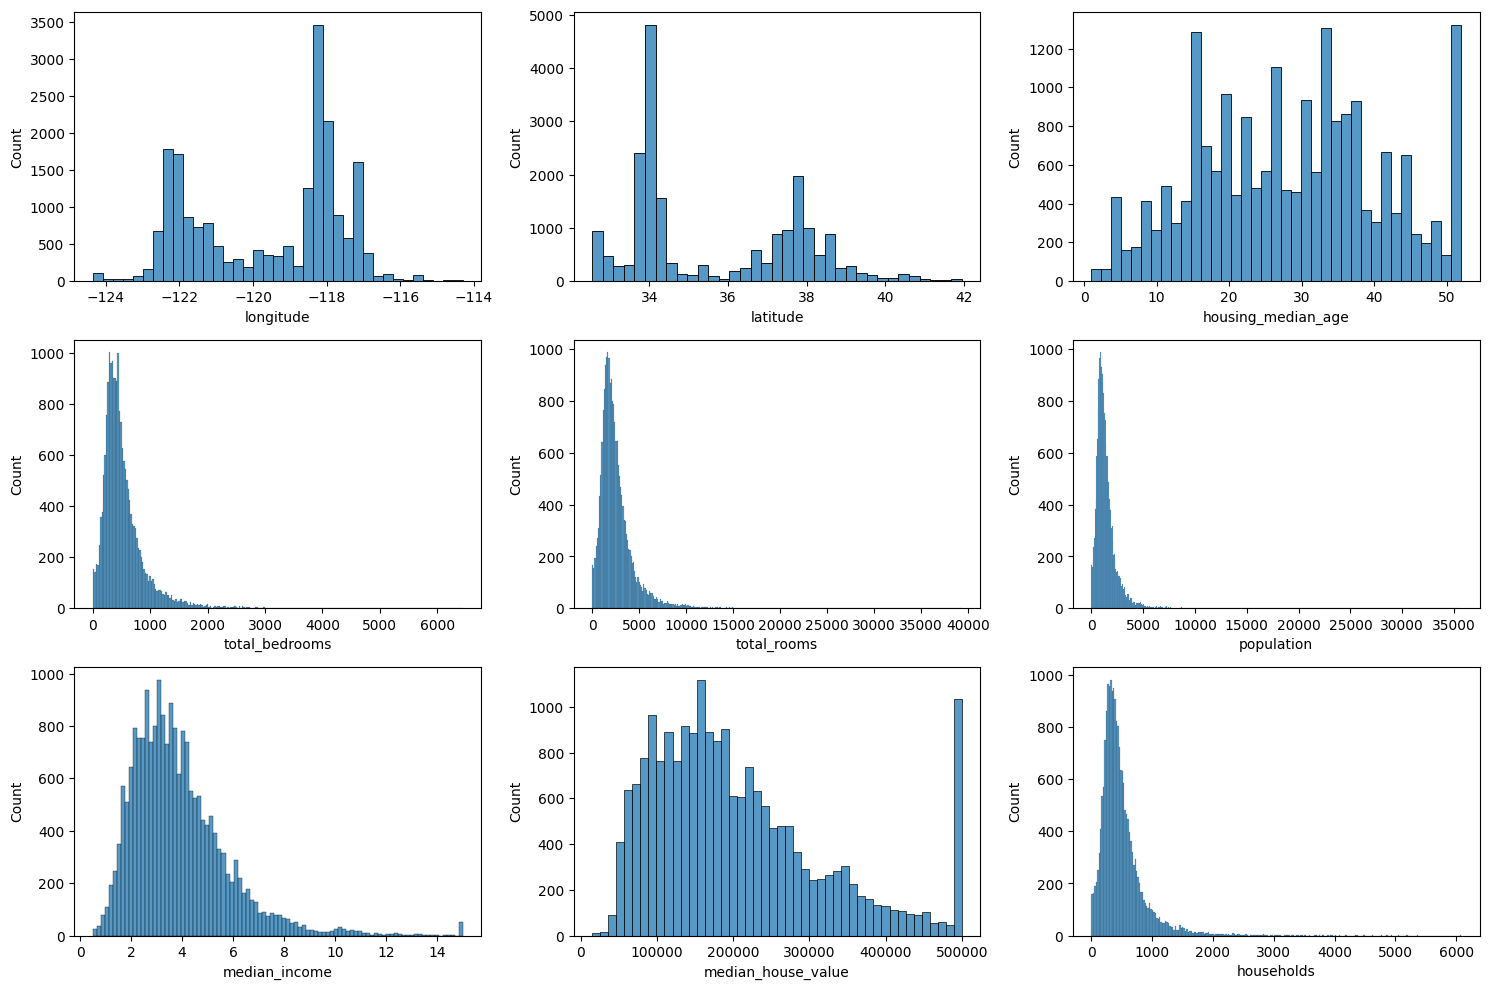

In [15]:
fig, ax = plt.subplots(3, 3, figsize=(15, 10))
sns.histplot(df, x='longitude', ax=ax[0,0])
sns.histplot(df, x='latitude', ax=ax[0,1])
sns.histplot(df, x='housing_median_age', ax=ax[0,2])
sns.histplot(df, x='total_bedrooms', ax=ax[1,0])
sns.histplot(df, x='total_rooms', ax=ax[1,1])
sns.histplot(df, x='population', ax=ax[1,2])
sns.histplot(df, x='households', ax=ax[2,2])
sns.histplot(df, x='median_income', ax=ax[2,0])
sns.histplot(df, x='median_house_value', ax=ax[2,1])
plt.tight_layout()
plt.show()

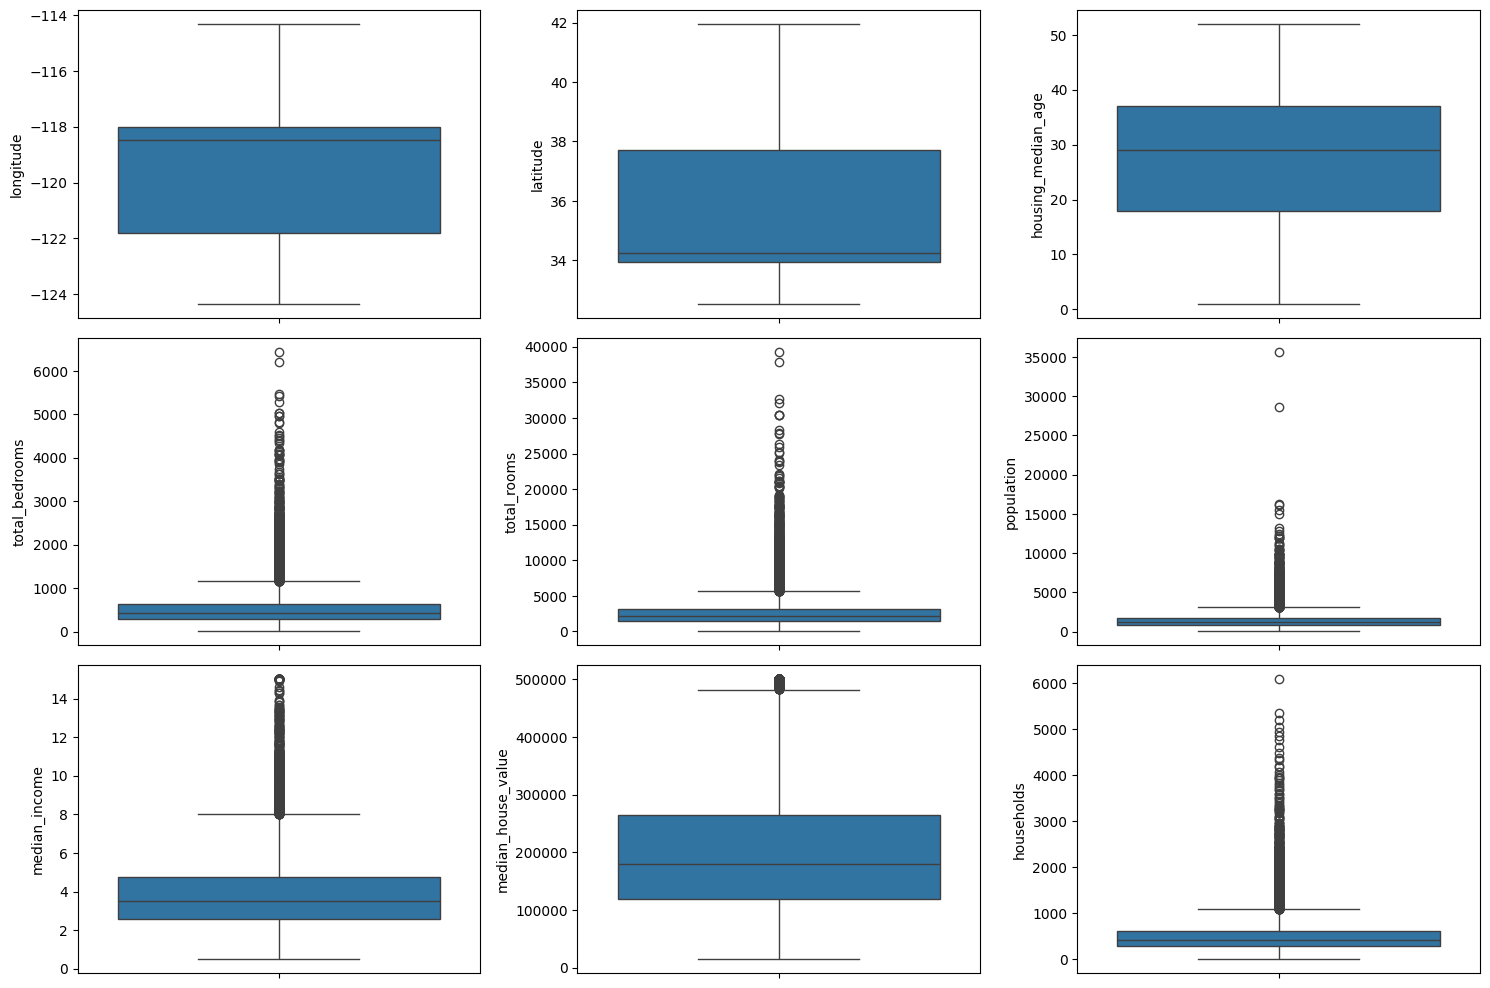

In [16]:
fig, ax = plt.subplots(3, 3, figsize=(15, 10))
sns.boxplot(df, y='longitude', ax=ax[0,0])
sns.boxplot(df, y='latitude', ax=ax[0,1])
sns.boxplot(df, y='housing_median_age', ax=ax[0,2])
sns.boxplot(df, y='total_bedrooms', ax=ax[1,0])
sns.boxplot(df, y='total_rooms', ax=ax[1,1])
sns.boxplot(df, y='population', ax=ax[1,2])
sns.boxplot(df, y='households', ax=ax[2,2])
sns.boxplot(df, y='median_income', ax=ax[2,0])
sns.boxplot(df, y='median_house_value', ax=ax[2,1])
plt.tight_layout()
plt.show()

In [17]:
from sklearn.preprocessing import OneHotEncoder

In [18]:
df = df.copy()

In [19]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [20]:
cols = ['total_bedrooms', 'total_rooms', 'population', 'median_income', 'households']

In [21]:
df_log = df.copy()

In [22]:
df_log[cols]= df_log[cols].apply(np.log1p)

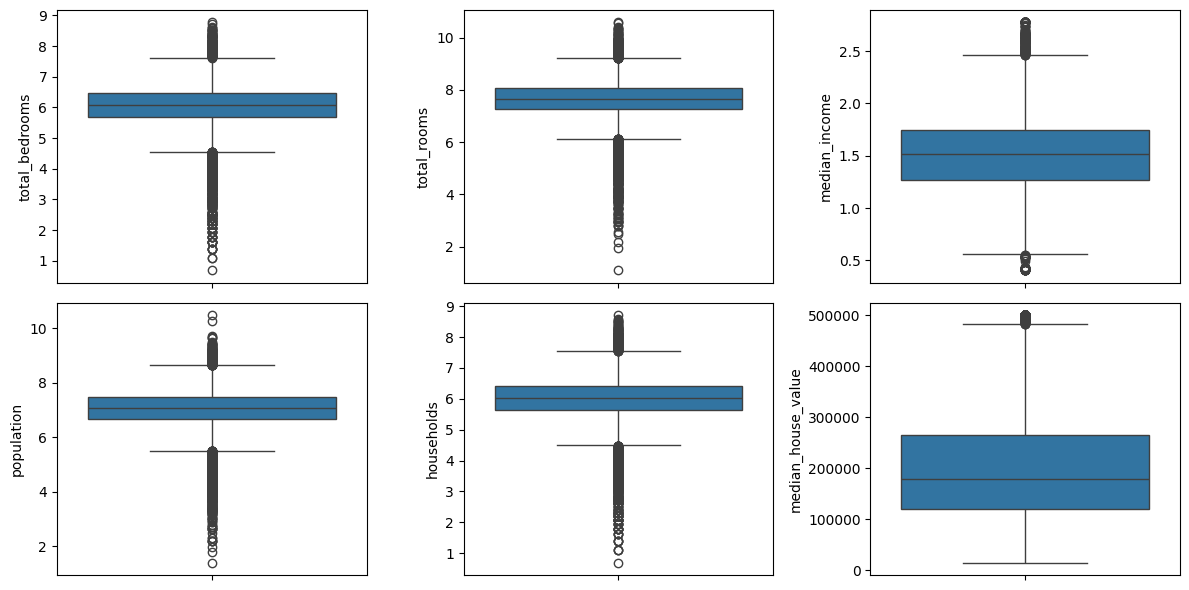

In [23]:
fig, ax = plt.subplots(2, 3, figsize=(12, 6))
sns.boxplot(df_log, y='total_bedrooms', ax=ax[0,0])
sns.boxplot(df_log, y='total_rooms', ax=ax[0,1])
sns.boxplot(df_log, y='population', ax=ax[1,0])
sns.boxplot(df_log, y='households', ax=ax[1,1])
sns.boxplot(df_log, y='median_income', ax=ax[0,2])
sns.boxplot(df_log, y='median_house_value', ax=ax[1,2])
plt.tight_layout()
plt.show()

In [106]:
from sklearn.preprocessing import RobustScaler, OneHotEncoder, FunctionTransformer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.metrics import mean_squared_error, r2_score

In [25]:
df = df[~df['ocean_proximity'].isin(['ISLAND', 'NEAR BAY'])]

In [26]:
X = df.drop(['median_house_value', 'households'], axis=1)
y = df['median_house_value']

numerical_cols = X.select_dtypes(np.number).columns
cat_cols = X.select_dtypes('object').columns

In [27]:
def log_transform(df):
    skewed_cols = []
    for col in numerical_cols:
        if abs(X[col].skew()) > 1:
            skewed_cols.append(col)
    for col in skewed_cols:
        df[col] = np.log1p(df[col])  
    
    return df

In [28]:
numerical_pipeline = Pipeline(steps=[
    ('log', FunctionTransformer(log_transform, validate=False)),
    ('scaler', RobustScaler())
])

In [29]:
cat_pipeline = Pipeline(steps=[
    ('enc', OneHotEncoder(drop='first', handle_unknown='ignore', sparse_output=False))
])

In [30]:
preprocessor = ColumnTransformer(transformers=[
    ('num', numerical_pipeline, numerical_cols),
    ('cat', cat_pipeline, cat_cols)
])

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [97]:
rf_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', RandomForestRegressor(
        random_state=42,
        max_depth = 40,
        min_samples_split = 2,
        n_estimators= 300,
        min_samples_leaf = 2
    ))
])

In [98]:
rf_pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('log',
                                                                   FunctionTransformer(func=<function log_transform at 0x00000254C0E911C0>)),
                                                                  ('scaler',
                                                                   RobustScaler())]),
                                                  Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'median_income'],
      dtype='object')),
                                                 ('cat',
                                                  Pipeline(steps=[('enc',
                                                                   OneHotEncoder(drop='first',
                                                                                 handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  Index(['ocean_proximity'], dtype='object'))])),
                ('model',
                 RandomForestRegressor(max_depth=40, min_samples_leaf=2,
                                       n_estimators=300, random_state=42))])

In [99]:
rf_pred = rf_pipeline.predict(X_test)
rf_rmse = np.sqrt(mean_squared_error(y_test, rf_pred))
print(f"Random Forest RMSE: {rf_rmse:.2f}")

Random Forest RMSE: 45718.64


In [100]:
xg_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', XGBRegressor(random_state=42,
                          max_depth=None,
                          learning_rate=0.1,
                          n_estimators=200))
])

In [112]:
xg_pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('log',
                                                                   FunctionTransformer(func=<function log_transform at 0x00000254C0E911C0>)),
                                                                  ('scaler',
                                                                   RobustScaler())]),
                                                  Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'median_income'],
      dtype='object')),
                                                 ('cat',
                                                  Pipeline(steps=[('enc...
                              feature_types=None, gamma=None, grow_policy=None,
                              importance_type=None,
                              interaction_constraints=None, learning_rate=0.1,
                              max_bin=None, max_cat_threshold=None,
                              max_cat_to_onehot=None, max_delta_step=None,
                              max_depth=None, max_leaves=None,
                              min_child_weight=None, missing=nan,
                              monotone_constraints=None, multi_strategy=None,
                              n_estimators=200, n_jobs=None,
                              num_parallel_tree=None, random_state=42, ...))])

In [84]:
xg_pred = xg_pipeline.predict(X_test)
xg_rmse = np.sqrt(mean_squared_error(y_test, xg_pred))
print(f"XGB Regressor RMSE: {xg_rmse:.2f}")

XGB Regressor RMSE: 43909.75


In [38]:
df_encoded = pd.get_dummies(df, drop_first=True)

In [39]:
corr_matrix = df_encoded.corr()

In [40]:
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

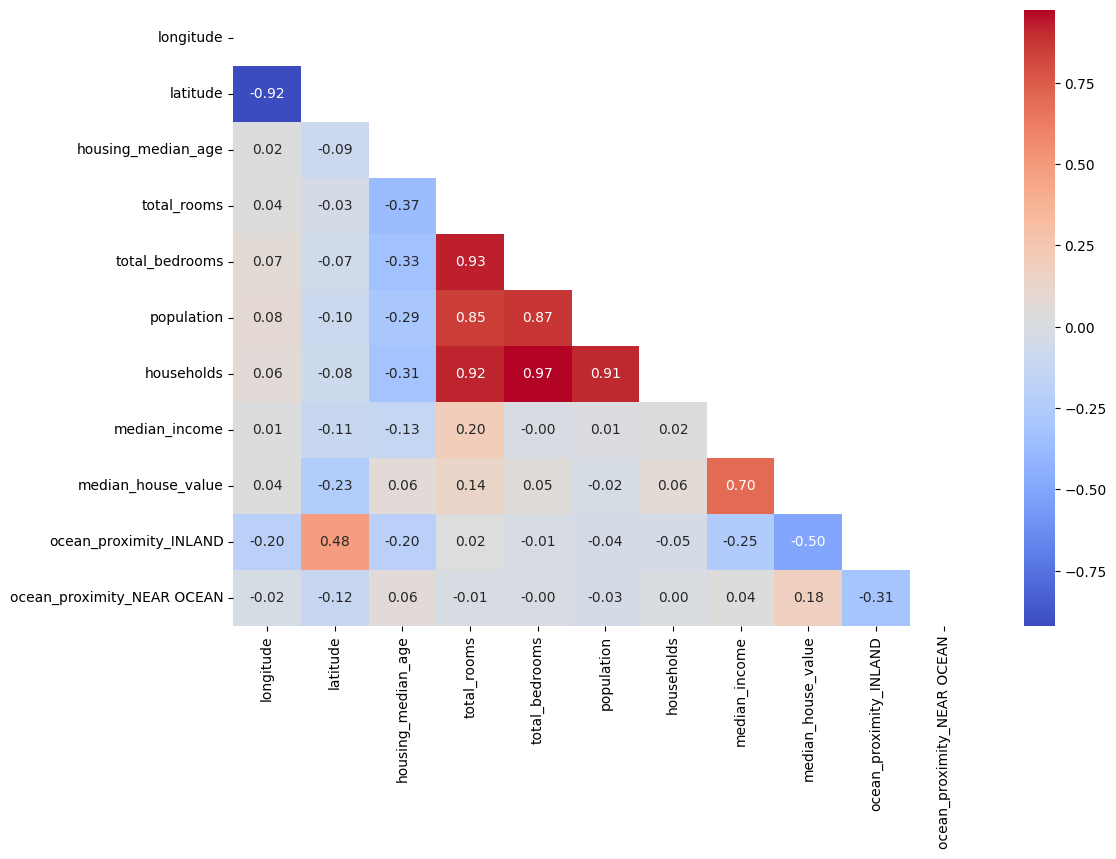

In [41]:
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, mask=mask, fmt='.2f', cmap='coolwarm')
plt.show()

In [109]:
rf_model = rf_pipeline.named_steps['model']
xg_model = xg_pipeline.named_steps['model']

In [45]:
# Step to Extract One-Hot Encoded Feature Names
column_transformer = rf_pipeline.named_steps['preprocessor']

# Access the OneHotEncoder's feature names
one_hot_encoder = column_transformer.named_transformers_['cat'].named_steps['enc']
one_hot_feature_names = one_hot_encoder.get_feature_names_out(cat_cols)

# Combine all feature names
all_feature_names = np.concatenate([numerical_cols, one_hot_feature_names])

<Axes: >

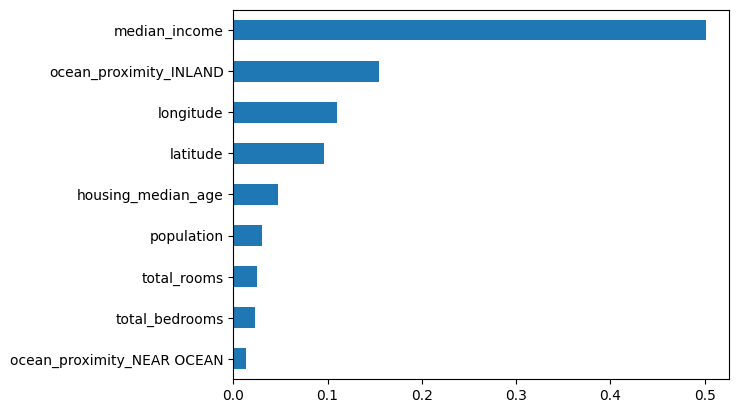

In [111]:
importances = pd.Series(rf_model.feature_importances_, index=all_feature_names)
importances.sort_values().plot(kind='barh')

<Axes: >

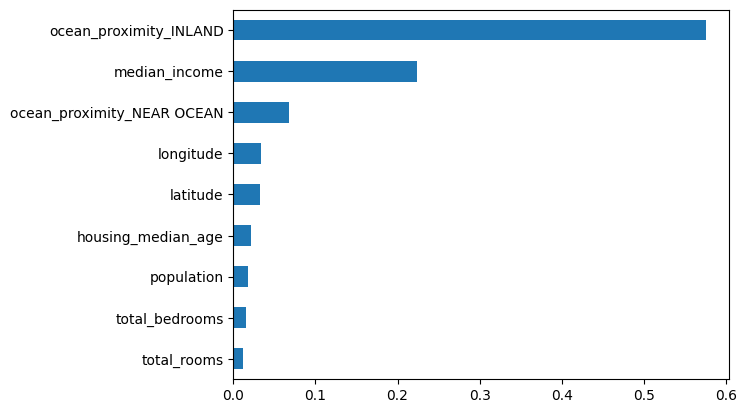

In [113]:
importances = pd.Series(xg_model.feature_importances_, index=all_feature_names)
importances.sort_values().plot(kind='barh')

In [47]:
importance_df = pd.DataFrame({'Feature': all_feature_names, 'Importance': importances})
importance_df.sort_values(by='Importance')

,Feature,Importance
ocean_proximity_NEAR OCEAN,ocean_proximity_NEAR OCEAN,0.013916
total_bedrooms,total_bedrooms,0.021756
total_rooms,total_rooms,0.024268
population,population,0.029899
housing_median_age,housing_median_age,0.046320
latitude,latitude,0.095940
longitude,longitude,0.109423
ocean_proximity_INLAND,ocean_proximity_INLAND,0.155181
median_income,median_income,0.503299


In [48]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(rf_pipeline, X, y, cv=3)

print("Mean CV Accuracy:", scores.mean())


Mean CV Accuracy: 0.6091373035554724


In [49]:
scores = cross_val_score(rf_pipeline, X, y, cv=5, scoring='neg_mean_squared_error')

# Convert negative MSE to RMSE
rmse_scores = np.sqrt(-scores)

# Print RMSE for each fold
print("RMSE for each fold:")
print(rmse_scores)

# Print the mean RMSE across all folds
print(f"\nMean RMSE: {rmse_scores.mean()}")

# print("Mean CV Accuracy:", scores.mean())

RMSE for each fold:
[56988.6769138  66123.779033   63618.6018786  89565.30376854
 63453.93071712]

Mean RMSE: 67950.05846221451


In [50]:
threshold = 0.005
important_features = importance_df[importance_df['Importance'] >= threshold]

# Display important features
print("Important Features:")
print(important_features)

Important Features:
                                               Feature  Importance
longitude                                    longitude    0.109423
latitude                                      latitude    0.095940
housing_median_age                  housing_median_age    0.046320
total_rooms                                total_rooms    0.024268
total_bedrooms                          total_bedrooms    0.021756
population                                  population    0.029899
median_income                            median_income    0.503299
ocean_proximity_INLAND          ocean_proximity_INLAND    0.155181
ocean_proximity_NEAR OCEAN  ocean_proximity_NEAR OCEAN    0.013916


In [51]:
print(f"Random Forest RMSE: {rf_rmse:.2f}")

Random Forest RMSE: 45708.19


In [52]:
np.array(rf_pred)

array([172304.85074074, 287480.64897787, 353419.94226647, ...,
       260207.67106085, 165446.71203704, 170327.16243386])

In [53]:
np.array(y_test)

array([154400., 304100., 330700., ..., 344800., 117600., 184500.])

In [95]:
param_grid = {
    'model__n_estimators': [200, 300],
    'model__max_depth': [30, 40, 50],
    'model__min_samples_split': [2, 5, 10],
    'model__min_samples_leaf': [1, 2]
}

In [96]:
ran_search = RandomizedSearchCV(rf_pipeline, param_grid, scoring='neg_mean_squared_error', verbose=1, n_jobs=-1, cv=5)

ran_search.fit(X_train, y_train)

print("Best parameters:", ran_search.best_params_)

# Evaluate on the test set
best_model = ran_search.best_estimator_
test_score = best_model.score(X_test, y_test)
print("Test score:", test_score)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best parameters: {'model__n_estimators': 300, 'model__min_samples_split': 2, 'model__min_samples_leaf': 2, 'model__max_depth': 40}
Test score: 0.8322599889072801


In [144]:
grid_search = GridSearchCV(rf_pipeline, param_grid, scoring='neg_mean_squared_error', verbose=1, n_jobs=-1, cv=5)

In [145]:
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 36 candidates, totalling 180 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num',
                                                                         Pipeline(steps=[('log',
                                                                                          FunctionTransformer(func=<function log_transform at 0x000002F601C23D80>)),
                                                                                         ('scaler',
                                                                                          RobustScaler())]),
                                                                         Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'median_income'],
      dtype='object')),...
                                                                         Pipeline(steps=[('enc',
                                                                                          OneHotEncoder(drop='first',
                                                                                                        handle_unknown='ignore',
                                                                                                        sparse_output=False))]),
                                                                         Index(['ocean_proximity'], dtype='object'))])),
                                       ('model',
                                        RandomForestRegressor(random_state=42))]),
             n_jobs=-1,
             param_grid={'model__max_depth': [None, 10, 20, 30],
                         'model__min_samples_split': [2, 5, 10],
                         'model__n_estimators': [50, 100, 200]},
             scoring='neg_mean_squared_error', verbose=1)

In [146]:
# Best parameters and score
print("Best parameters:", grid_search.best_params_)
print("Best cross-validation score:", -grid_search.best_score_)

# Evaluate on the test set
best_model = grid_search.best_estimator_
test_score = best_model.score(X_test, y_test)
print("Test score:", test_score)

Best parameters: {'model__max_depth': 30, 'model__min_samples_split': 5, 'model__n_estimators': 200}
Best cross-validation score: 2323291433.221217
Test score: 0.8294937333383889


In [85]:
param_grid_xg = {
    'model__n_estimators': [100, 200, 300, 400],
    'model__max_depth': [None, 10, 20, 30],
    'model__learning_rate': [0.01, 0.1, 0.2]
}

In [87]:
grid_search = RandomizedSearchCV(xg_pipeline, param_grid_xg, scoring='neg_mean_squared_error', verbose=1, n_jobs=-1, cv=5)

grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('preprocessor',
                                              ColumnTransformer(transformers=[('num',
                                                                               Pipeline(steps=[('log',
                                                                                                FunctionTransformer(func=<function log_transform at 0x00000254C0E911C0>)),
                                                                                               ('scaler',
                                                                                                RobustScaler())]),
                                                                               Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'median_income'],
      dtype='obje...
                                                           max_leaves=None,
                                                           min_child_weight=None,
                                                           missing=nan,
                                                           monotone_constraints=None,
                                                           multi_strategy=None,
                                                           n_estimators=500,
                                                           n_jobs=None,
                                                           num_parallel_tree=None,
                                                           random_state=42, ...))]),
                   n_jobs=-1,
                   param_distributions={'model__learning_rate': [0.01, 0.1,
                                                                 0.2],
                                        'model__max_depth': [None, 10, 20, 30],
                                        'model__n_estimators': [100, 200, 300,
                                                                400]},
                   scoring='neg_mean_squared_error', verbose=1)

In [ ]:
grid_search = GridSearchCV(xg_pipeline, param_grid_xg, scoring='neg_mean_squared_error', verbose=1, n_jobs=-1, cv=3)

grid_search.fit(X_train, y_train)

In [89]:
print("Best parameters:", grid_search.best_params_)

# Evaluate on the test set
best_model = grid_search.best_estimator_
test_score = best_model.score(X_test, y_test)
print("Test score:", test_score)

Best parameters: {'model__n_estimators': 200, 'model__max_depth': None, 'model__learning_rate': 0.1}
Test score: 0.8424952300382083


In [105]:
print(f"Random Forest RMSE: {rf_rmse:.2f}")
print(f"XGBoost RMSE: {xg_rmse:.2f}")

Random Forest RMSE: 45718.64
XGBoost RMSE: 43909.75


In [107]:
r2 = r2_score(y_test, rf_pred)
print("R² score:", r2)

R² score: 0.8322599889072801


In [108]:
r2 = r2_score(y_test, xg_pred)
print("R² score:", r2)

R² score: 0.8452709146666072
